In [53]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [54]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import koreanize_matplotlib

In [56]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

#### Stateless방식
1. 사용자가 Figure Axes 객체를 직접 생성
2. oop방식
3. 복잡한 레이아웃을 시각화하거나 세밀한 플로팅을 할때

In [ ]:
plt.subplots?

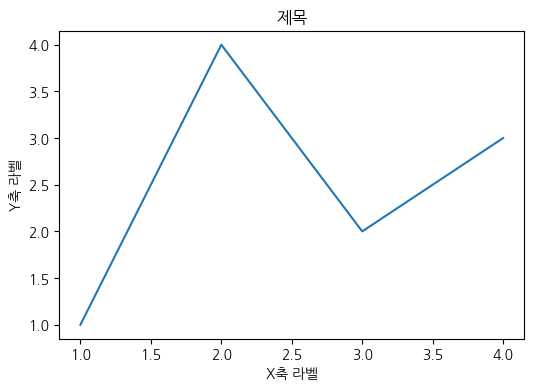

In [58]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot([1,2,3,4], [1,4,2,3])
ax.set_title('제목')
ax.set_xlabel('X축 라벨')
ax.set_ylabel('Y축 라벨')
plt.show()

빈의 경계 구하는 과정

    데이터의 최소값과 최대값 찾기:
        주어진 데이터에서 최소값과 최대값을 찾아야 합니다.
        예를 들어, 데이터가 [1, 1, 2, 2, 2, 3, 4, 4, 4]일 경우:
            최소값: 1
            최대값: 4

    빈의 수 결정:
        사용자가 설정한 빈의 수에 따라 데이터의 범위를 나누게 됩니다. 이 경우, bins=2로 설정되어 있습니다.

    빈의 너비 계산:
        빈의 너비는 다음과 같이 계산됩니다: [ \text{빈의 너비} = \frac{\text{최대값} - \text{최소값}}{\text{빈의 수}} ]
        위의 예에서: [ \text{빈의 너비} = \frac{4 - 1}{2} = 1.5 ]

    빈의 경계 설정:
        첫 번째 빈의 시작은 최소값에서 시작하고, 빈의 너비에 따라 끝을 설정합니다.
        첫 번째 빈의 경계:
            시작: 1.0
            끝: 1.0 + 1.5 = 2.5

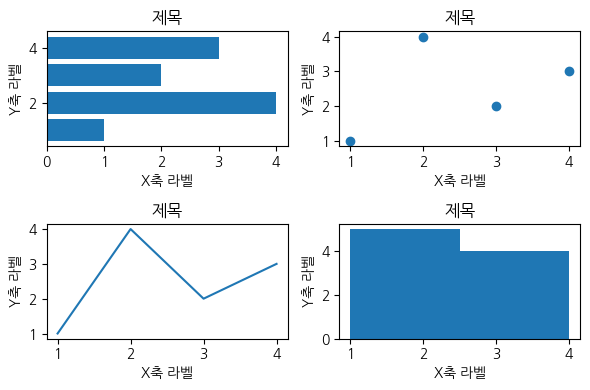

In [59]:
fig, axes = plt.subplots(2,2, figsize=(6,4))
axes[1][0].plot([1,2,3,4], [1,4,2,3])
axes[1][0].set_title('제목')
axes[1][0].set_xlabel('X축 라벨')
axes[1][0].set_ylabel('Y축 라벨')

axes[0][1].scatter([1,2,3,4], [1,4,2,3])
axes[0][1].set_title('제목')
axes[0][1].set_xlabel('X축 라벨')
axes[0][1].set_ylabel('Y축 라벨')

axes[0][0].barh([1,2,3,4], [1,4,2,3])
axes[0][0].set_title('제목')
axes[0][0].set_xlabel('X축 라벨')
axes[0][0].set_ylabel('Y축 라벨')

axes[1][1].hist([1,1,2,2,2,3,4,4,4], bins=2)
axes[1][1].set_title('제목')
axes[1][1].set_xlabel('X축 라벨')
axes[1][1].set_ylabel('Y축 라벨')

plt.tight_layout()
plt.show()


#### 데이터 프레임에서 플로팅

In [60]:
import random

random.seed(1)
data = {
  '국어':random.sample(range(60,100+1),5),
  '영어':random.sample(range(60,100+1),5),
  '수학':random.sample(range(60,100+1),5),
}
data

{'국어': [68, 96, 64, 76, 67],
 '영어': [91, 88, 90, 84, 73],
 '수학': [66, 91, 61, 84, 87]}

In [61]:
df = pd.DataFrame(data=data, index=['홍1','홍2','홍3','홍4','홍5',])
df

,국어,영어,수학
홍1,68,91,66
홍2,96,88,91
홍3,64,90,61
홍4,76,84,84
홍5,67,73,87


<Axes: >

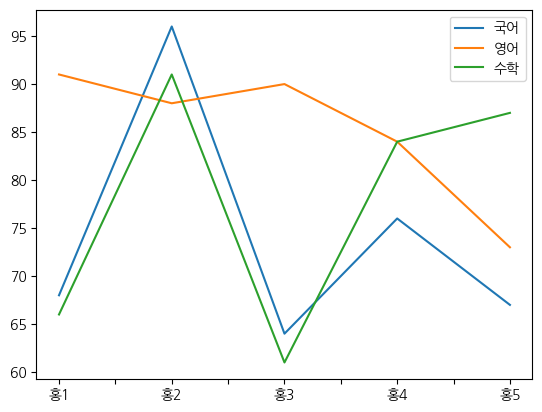

In [62]:
df.plot()

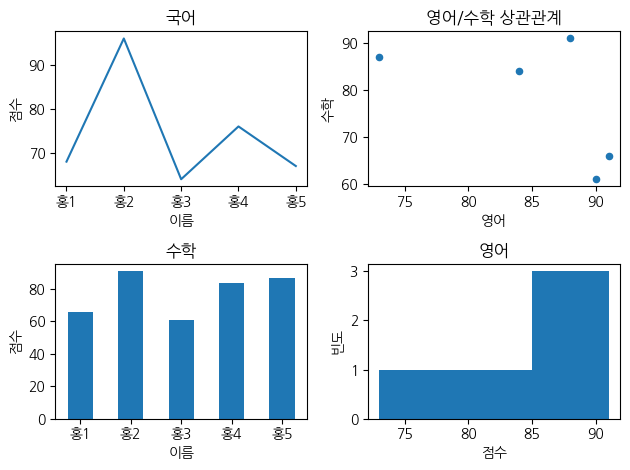

In [ ]:
fig, axes = plt.subplots(2,2)
fig.suptitle = '점수 분석'
df['국어'].plot(ax=axes[0][0],kind='line')
df['수학'].plot(ax=axes[1][0],kind='bar', rot=0)
df['영어'].plot(ax=axes[1][1],kind='hist', bins=3)
df.plot(x='영어', y='수학', ax=axes[0][1],kind='scatter')

axes[0][0].set_title('국어')
axes[0][0].set_xlabel('이름')
axes[0][0].set_ylabel('점수')

axes[1][0].set_title('수학')
axes[1][0].set_xlabel('이름')
axes[1][0].set_ylabel('점수')

axes[1][1].set_title('영어')
axes[1][1].set_xlabel('점수')
axes[1][1].set_ylabel('빈도')

axes[0][1].set_title('영어/수학 상관관계')


plt.tight_layout()
plt.show()

#### seaborn에서 플로팅하기

(<Figure size 640x480 with 1 Axes>, <Axes: >)

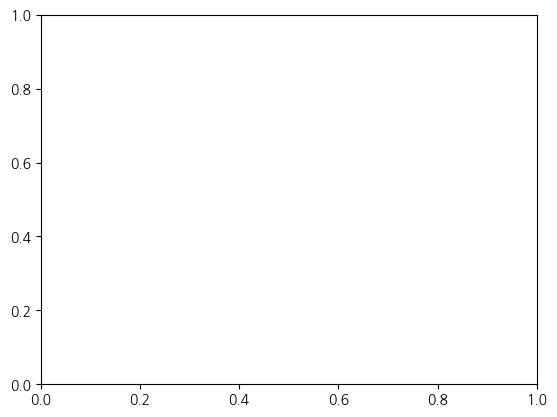

In [64]:
plt.gcf(), plt.gca()

<Axes: xlabel='None', ylabel='수학'>

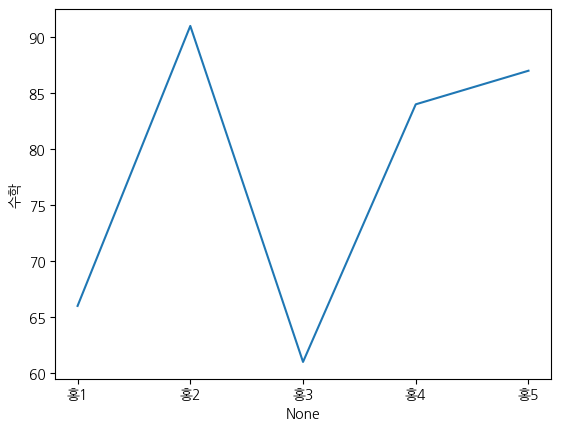

In [65]:
sns.lineplot(data,x=df.index, y='수학')
# sns.lineplot(data,x='국어', y='수학')

In [66]:
df = df.reset_index().rename(columns={'index':'이름'})
df.index.values

array([0, 1, 2, 3, 4], dtype=int64)

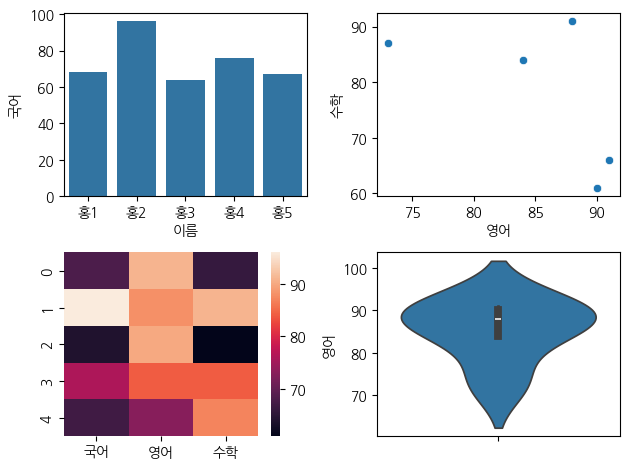

In [67]:
fig, axes = plt.subplots(2,2)
sns.barplot(data=df,x='이름', y='국어', ax=axes[0][0])
sns.scatterplot(data=df,x='영어', y='수학', ax=axes[0][1])
sns.boxplot(data=df,y='영어', ax=axes[1][0])
sns.violinplot(data=df,y='영어', ax=axes[1][1])
sns.heatmap(data=df.drop('이름',axis=1), ax=axes[1][0])

plt.tight_layout()
plt.show()

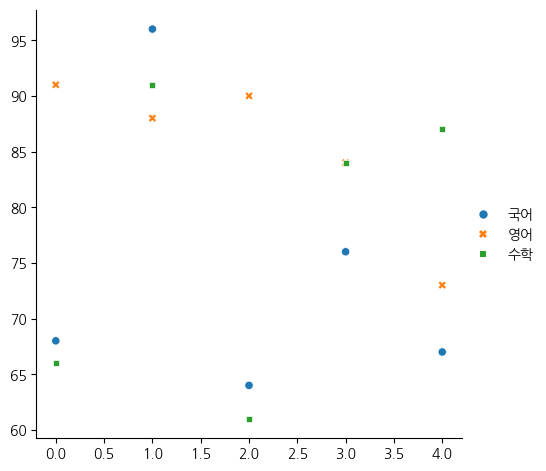

In [73]:
sns.relplot(data=df)

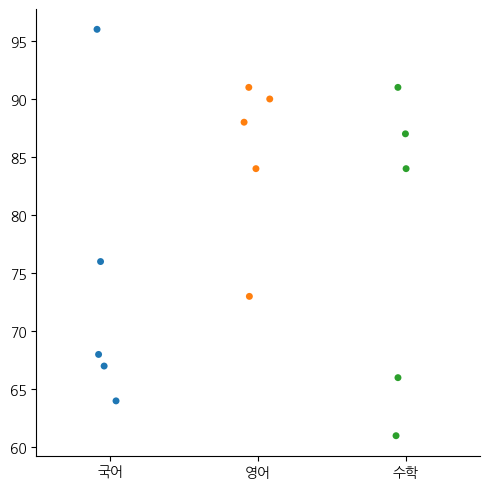

In [ ]:
sns.catplot(data=df)

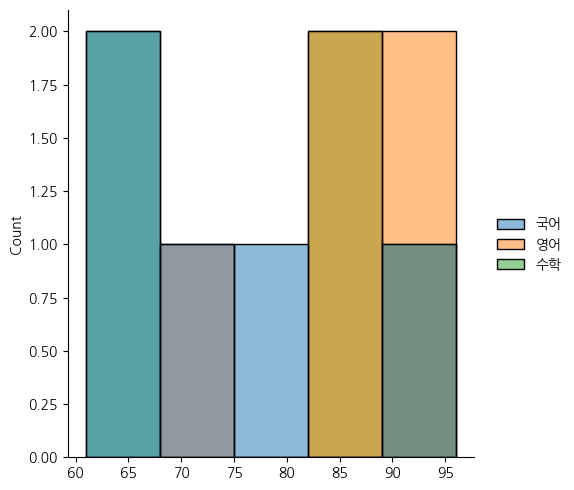

In [20]:
sns.displot(data=df)